# CyberBullying Detection using NLP & Machine Learning

### 1. Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import  TfidfVectorizer
import re
import string
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

### 2. Import Dataset

In [2]:
imdf_cyber = pd.read_csv("ExportedDatasets/cyberbullying_dataset.csv")

### 3.  Check first 10 lines

In [3]:
imdf_cyber.head(10)

tweet_text  cyberbullying_type
0         In other words your food was crapilicious                    0
1                                   Why is so white                    0
2         a classy whore Or more red velvet cupcakes                   0
3  meh P  thanks for the heads up but not too con...                   0
4  This is an ISIS account pretending to be a Kur...                   0
5  Yes the test of god is that good or bad or ind...                   0
6  Itu sekolah ya bukan tempat bully Ga jauh kaya...                   0
7  Karma I hope it bites Kat on the butt She is j...                   0
8                    everything but mostly my priest                   0
9  Rebecca Black Drops Out of School Due to Bullying                   0

### 4. Check Datasets type values and sum & drop duplicates

In [4]:
imdf_cyber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91801 entries, 0 to 91800
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          91801 non-null  object
 1   cyberbullying_type  91801 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ MB


In [5]:
imdf_cyber['cyberbullying_type'].value_counts()

1    50178
0    41623
Name: cyberbullying_type, dtype: int64

In [6]:
imdf_cyber.tweet_text.duplicated().sum()

40901

In [7]:
imdf_cyber.duplicated().sum()

37337

In [8]:
imdf_cyber.duplicated(subset=['tweet_text']).sum()

40901

In [9]:
final_dataset = imdf_cyber.drop_duplicates()
final_dataset.to_csv('ExportedDatasets/cyberbullying_dataset_duplicates.csv')

In [10]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54464 entries, 0 to 79706
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          54464 non-null  object
 1   cyberbullying_type  54464 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.2+ MB


In [11]:
final_dataset['cyberbullying_type'].value_counts()

1    39990
0    14474
Name: cyberbullying_type, dtype: int64

### 5. Graph of Dataset

[Text(0.5, 1.0, 'Graph of Dataset')]

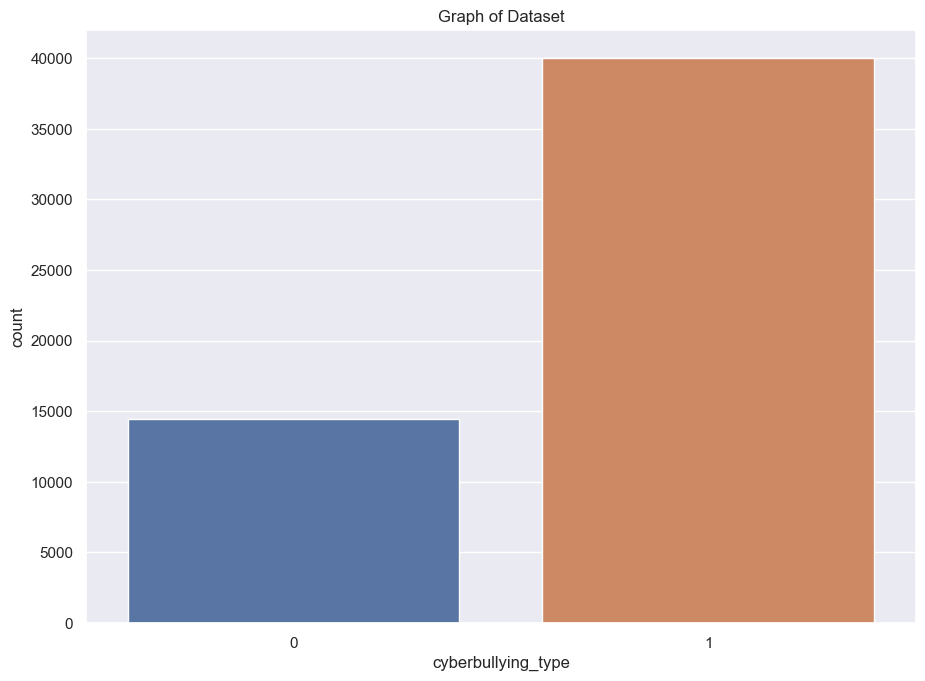

In [12]:
sns.set(rc={'figure.figsize':(10.7,7.7)})
sns.countplot(x='cyberbullying_type',data=final_dataset).set(title="Graph of Dataset")

### 5.1.1  Handle Imbalanced Dataset

In [13]:
cyberbullying = final_dataset[final_dataset.cyberbullying_type == 1]
print(cyberbullying)

                                              tweet_text  cyberbullying_type
7819   rape is realzvasiyana nema jokes about being d...                   1
7820   You never saw any celebrity say anything like ...                   1
7821   I mean hes gay but he uses gendered slurs and ...                   1
7822                                            feminazi                   1
7823   Rape is rape And the fact that I read one post...                   1
...                                                  ...                 ...
63871  I didnt think Id hate a couple more than these...                   1
63891  Nope call me sexist but gender roles are defin...                   1
63896   Some of you people will call me sexist and mi...                   1
63904        Im not sexist but I hate all female rappers                   1
79706   A Misogynist A woman wants her man to treat h...                   1

[39990 rows x 2 columns]


In [14]:
no_cyberbullying = final_dataset[final_dataset.cyberbullying_type == 0]
print(no_cyberbullying)

                                              tweet_text  cyberbullying_type
0             In other words your food was crapilicious                    0
1                                       Why is so white                    0
2             a classy whore Or more red velvet cupcakes                   0
3      meh P  thanks for the heads up but not too con...                   0
4      This is an ISIS account pretending to be a Kur...                   0
...                                                  ...                 ...
63915  Soz my kitchen rules Ive lost interest the ins...                   0
63916  Feeling so sorry for the girls they should be ...                   0
63917  pretty good dishes were happy with  OK well Im...                   0
63919              You are too stupid to talk to Blocked                   0
63920  And before you protest that youre not mad ther...                   0

[14474 rows x 2 columns]


In [15]:
cyberbullying_sample = cyberbullying.sample(n=15526)

In [16]:
print(cyberbullying_sample.shape)

(15526, 2)


In [17]:
final_dataset = pd.concat([cyberbullying_sample, no_cyberbullying], axis=0)

In [18]:
final_dataset.head()

tweet_text  cyberbullying_type
16016  Idiot lady is just propagating lies Where are ...                   1
9083    fuck no that bitch dont even suck dick  the K...                   1
33910  I think she bullied a girl in high school or s...                   1
21813  Thats the best you can is spout abuse because ...                   1
9585                                           yes it is                   1

In [19]:
final_dataset.shape

(30000, 2)

In [20]:
final_dataset.info

<bound method DataFrame.info of                                               tweet_text  cyberbullying_type
16016  Idiot lady is just propagating lies Where are ...                   1
9083    fuck no that bitch dont even suck dick  the K...                   1
33910  I think she bullied a girl in high school or s...                   1
21813  Thats the best you can is spout abuse because ...                   1
9585                                           yes it is                   1
...                                                  ...                 ...
63915  Soz my kitchen rules Ive lost interest the ins...                   0
63916  Feeling so sorry for the girls they should be ...                   0
63917  pretty good dishes were happy with  OK well Im...                   0
63919              You are too stupid to talk to Blocked                   0
63920  And before you protest that youre not mad ther...                   0

[30000 rows x 2 columns]>

### 6.  WordCloud of Dataset

In [21]:
text = ''.join(final_dataset["tweet_text"].tolist())

In [22]:
''.join(final_dataset["tweet_text"].tolist())

'Idiot lady is just propagating lies Where are RSS goons Can you identify RSS and Muslims separately in the video  fuck no that bitch dont even suck dick  the Kermit videos bout to fuck IG upI think she bullied a girl in high school or something and then liked a bunch of anti zigi tweets I think lolThats the best you can is spout abuse because I have an opinion Idiot if J witness a Catholic or Christian decided to pitch in a Muslim neighborhood and just pray would they stand for it No so fck off England is not a Muslim country yes it isUr campaign is globally uniting all Hindus and giving them a voice against Islamic terrorism What u have done is simply excellentIm a middle aged white guy that grew up in the south and went to school in mostly black communities Ive never called someone a negro To me its a slight Just my opinionObama calls himself a community organizer Hes a terrorist who has always hated America Blind idiots voted the Muslim POC into the White House twice You cant fix s

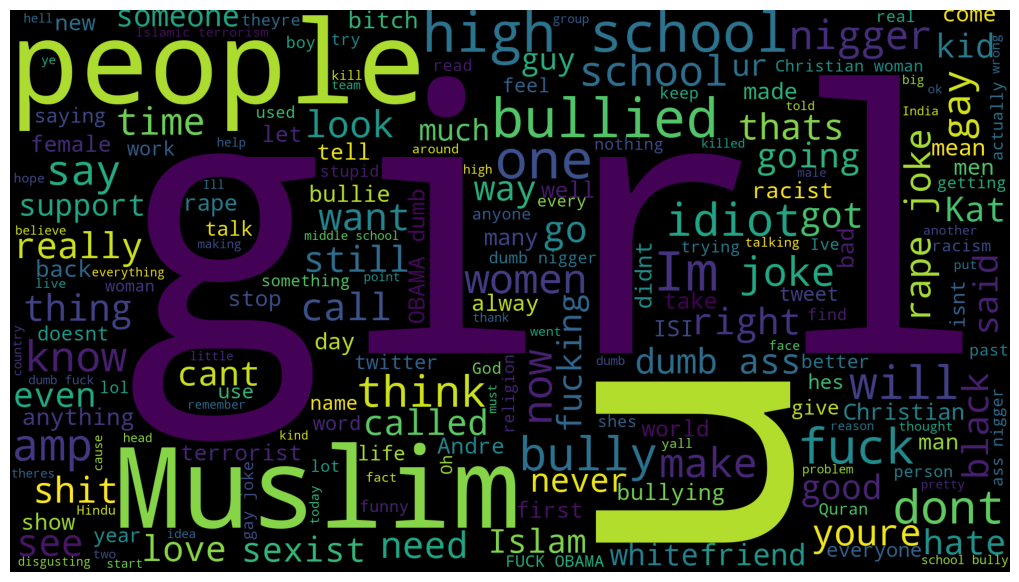

In [23]:
wordcloud = WordCloud(width=1920, height=1080).generate(text)
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### 7. Stopwords

In [24]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\giann\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

### 8. Data pre-processing

In [26]:
final_dataset.shape

(30000, 2)

In [27]:
final_dataset.head()

tweet_text  cyberbullying_type
16016  Idiot lady is just propagating lies Where are ...                   1
9083    fuck no that bitch dont even suck dick  the K...                   1
33910  I think she bullied a girl in high school or s...                   1
21813  Thats the best you can is spout abuse because ...                   1
9585                                           yes it is                   1

In [28]:
final_dataset.isnull().sum()

tweet_text            0
cyberbullying_type    0
dtype: int64

In [29]:
#separating tweet_text & cyberbullying_type
X = final_dataset.drop(columns='cyberbullying_type', axis=1)
Y = final_dataset['cyberbullying_type']
X.to_csv('ExportedDatasets/cyberbullying_X.csv')
Y.to_csv('ExportedDatasets/cyberbullying_Y.csv')

In [30]:
print(X)
print(Y)

                                              tweet_text
16016  Idiot lady is just propagating lies Where are ...
9083    fuck no that bitch dont even suck dick  the K...
33910  I think she bullied a girl in high school or s...
21813  Thats the best you can is spout abuse because ...
9585                                           yes it is
...                                                  ...
63915  Soz my kitchen rules Ive lost interest the ins...
63916  Feeling so sorry for the girls they should be ...
63917  pretty good dishes were happy with  OK well Im...
63919              You are too stupid to talk to Blocked
63920  And before you protest that youre not mad ther...

[30000 rows x 1 columns]
16016    1
9083     1
33910    1
21813    1
9585     1
        ..
63915    0
63916    0
63917    0
63919    0
63920    0
Name: cyberbullying_type, Length: 30000, dtype: int64


### 9. Stemming: Process of reducing a word to its root word

In [31]:
port_stem = PorterStemmer()

In [32]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [33]:
final_dataset['tweet_text'] = final_dataset['tweet_text'].apply(stemming)

In [34]:
print(final_dataset['tweet_text'])

16016    idiot ladi propag lie rss goon identifi rss mu...
9083     fuck bitch dont even suck dick kermit video bo...
33910    think bulli girl high school someth like bunch...
21813    that best spout abus opinion idiot j wit catho...
9585                                                    ye
                               ...                        
63915    soz kitchen rule ive lost interest instant res...
63916                feel sorri girl safe kat andr go home
63917    pretti good dish happi ok well im never eat place
63919                                    stupid talk block
63920    protest your mad there much reason youd tweet ...
Name: tweet_text, Length: 30000, dtype: object


In [35]:
text = ''.join(final_dataset["tweet_text"].tolist())
''.join(final_dataset["tweet_text"].tolist())

'idiot ladi propag lie rss goon identifi rss muslim separ videofuck bitch dont even suck dick kermit video bout fuck igthink bulli girl high school someth like bunch anti zigi tweet think lolthat best spout abus opinion idiot j wit cathol christian decid pitch muslim neighborhood pray would stand fck england muslim countriyeur campaign global unit hindu give voic islam terror u done simpli excelim middl age white guy grew south went school mostli black commun ive never call someon negro slight opinionobama call commun organ he terrorist alway hate america blind idiot vote muslim poc white hous twice cant fix stupidimagin black ladi listen dumb fuck nigger head hour fuck day dat ladi got strenfffffffbunch lie fake news what grade school name call bulli muchfirm belief imag sent new peopl supportag barr racist jimmi lohman overlap barr later columbia univers wrote piec florida flambeau newspap barr highschool tormentora classic bulli power abus put crunch everi chanc gotctfuuu mad fuck o

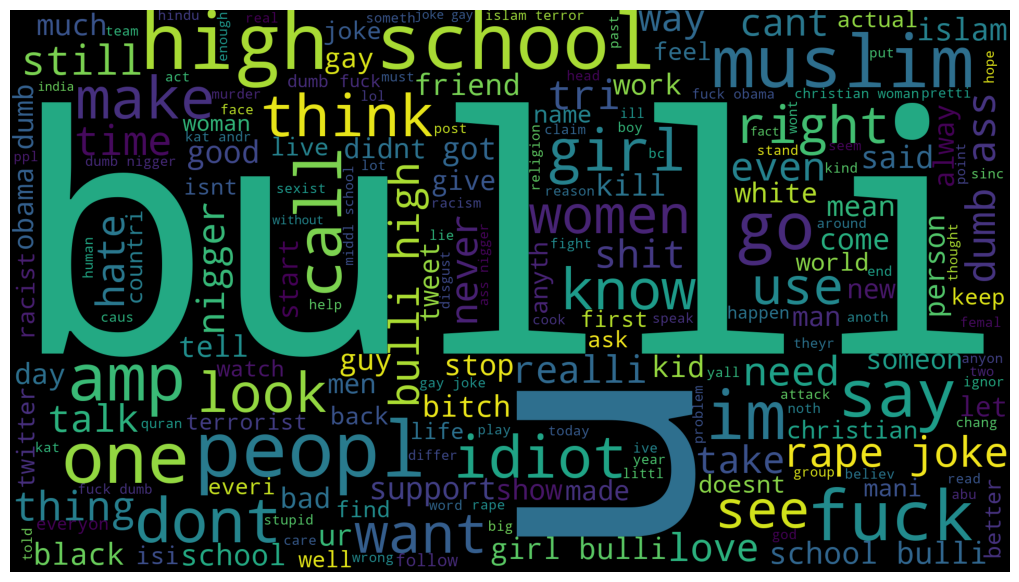

In [36]:
wordcloud = WordCloud(width=1920, height=1080).generate(text)
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [37]:
#separating tweet_text & cyberbullying_type
X = final_dataset['tweet_text']
Y = final_dataset['cyberbullying_type']

In [38]:
print(X)

16016    idiot ladi propag lie rss goon identifi rss mu...
9083     fuck bitch dont even suck dick kermit video bo...
33910    think bulli girl high school someth like bunch...
21813    that best spout abus opinion idiot j wit catho...
9585                                                    ye
                               ...                        
63915    soz kitchen rule ive lost interest instant res...
63916                feel sorri girl safe kat andr go home
63917    pretti good dish happi ok well im never eat place
63919                                    stupid talk block
63920    protest your mad there much reason youd tweet ...
Name: tweet_text, Length: 30000, dtype: object


In [39]:
X.shape

(30000,)

In [40]:
print(Y)

16016    1
9083     1
33910    1
21813    1
9585     1
        ..
63915    0
63916    0
63917    0
63919    0
63920    0
Name: cyberbullying_type, Length: 30000, dtype: int64


In [41]:
Y.shape

(30000,)

### 11. Train/Test Splitting

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=3)

when random_state set to an integer, train_test_split will return same results for each execution.

when random_state set to an None, train_test_split will return different results for each execution.

In [43]:
X_train.shape

(18000,)

In [44]:
X_test.shape

(12000,)

In [45]:
Y_train.shape

(18000,)

In [46]:
Y_test.shape

(12000,)

### 10. Feature Extraction (Converting the textual data to numerical data)

In [47]:
vectorizer = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)

X_train_transform = vectorizer.fit_transform(X_train)
X_test_transform = vectorizer.transform(X_test)

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [48]:
print(X_train_transform)

  (0, 8089)	0.4954653106346051
  (0, 12595)	0.6102926254973314
  (0, 5048)	0.29193348784355616
  (0, 9365)	0.2002453452425168
  (0, 15960)	0.23168073144064022
  (0, 8946)	0.16359575694563538
  (0, 10624)	0.18032511860355113
  (0, 5848)	0.16353943123419834
  (0, 4582)	0.18140718230786965
  (0, 14737)	0.2900401434859901
  (1, 6440)	0.19135826703427478
  (1, 16921)	0.1553762455626009
  (1, 3770)	0.15698405509060864
  (1, 15892)	0.28552866951227385
  (1, 13887)	0.2071936182956926
  (1, 17179)	0.19419075527979995
  (1, 542)	0.41901743647431194
  (1, 14762)	0.19539862640203903
  (1, 16357)	0.23904170497003688
  (1, 12197)	0.20764331068767328
  (1, 1636)	0.14223287632076076
  (1, 5418)	0.16291109814775578
  (1, 13812)	0.5326249564461829
  (1, 9380)	0.19108845449441475
  (1, 17346)	0.2085622962520923
  :	:
  (17997, 6583)	0.3113139663859167
  (17997, 9575)	0.49672926632567976
  (17997, 10624)	0.22762679459129145
  (17997, 5848)	0.20643799826337902
  (17997, 4582)	0.2289926979910231
  (17998, 1

In [49]:
print(X_test_transform)

  (1, 13561)	0.7000886793006708
  (1, 8332)	0.3934173265497127
  (1, 3752)	0.5959015424426416
  (2, 15578)	0.19698616722499498
  (2, 14545)	0.2622213245211035
  (2, 14200)	0.3042060320927645
  (2, 8946)	0.1432677575861126
  (2, 8803)	0.38672672715543044
  (2, 8462)	0.25209176722061316
  (2, 6768)	0.4041369900440616
  (2, 6476)	0.32720064516840597
  (2, 5045)	0.3086138979560814
  (2, 4129)	0.25992047102414856
  (2, 213)	0.36479238996545355
  (3, 17225)	0.2115024798790423
  (3, 16489)	0.1978028341820796
  (3, 13172)	0.1874202221145443
  (3, 11617)	0.31693642697412666
  (3, 8809)	0.2639364312162959
  (3, 8778)	0.309013472093825
  (3, 5315)	0.33259940798329723
  (3, 5294)	0.5353827641492168
  (3, 4446)	0.31256243348536483
  (3, 2746)	0.19965449500304952
  (3, 1971)	0.2839008157705327
  :	:
  (11997, 521)	0.17157762576722085
  (11998, 13344)	0.4537294128137093
  (11998, 12332)	0.4119854715396835
  (11998, 10299)	0.2217613366890465
  (11998, 8544)	0.24304371277417858
  (11998, 7368)	0.236237

### 12. Training the Model: Logistic Regression (LR)

In [50]:
modelLR = LogisticRegression()

In [51]:
modelLR.fit(X_train_transform, Y_train)

LogisticRegression()

#### Evaluation: Accuracy Score

In [52]:
X_train_prediction = modelLR.predict(X_train_transform)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [53]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.8654444444444445


In [54]:
X_test_prediction = modelLR.predict(X_test_transform)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [55]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.82075


In [56]:
print(classification_report(X_test_prediction,Y_test))

              precision    recall  f1-score   support

           0       0.87      0.78      0.82      6434
           1       0.77      0.86      0.82      5566

    accuracy                           0.82     12000
   macro avg       0.82      0.82      0.82     12000
weighted avg       0.83      0.82      0.82     12000



### 13. Training the Model: Support Vector Machine(SVM)

In [57]:
from sklearn.svm import LinearSVC

svm = LinearSVC(C=0.0001)
svm.fit(X_train_transform, Y_train)

LinearSVC(C=0.0001)

In [58]:
svm_predict = svm.predict(X_train_transform)
svm_training_data_accuracy = accuracy_score(Y_train,svm_predict)

print('Accuracy score of the training data : ', svm_training_data_accuracy)

Accuracy score of the training data :  0.5185555555555555


In [59]:
svm_predict_test = svm.predict(X_test_transform)
svm_test_data_accuracy = accuracy_score(Y_test,svm_predict_test)

print('Accuracy score of the test data : ', svm_test_data_accuracy)

Accuracy score of the test data :  0.5191666666666667


In [60]:
print(classification_report(svm_predict_test,Y_test))

              precision    recall  f1-score   support

           0       0.00      0.95      0.01        19
           1       1.00      0.52      0.68     11981

    accuracy                           0.52     12000
   macro avg       0.50      0.73      0.34     12000
weighted avg       1.00      0.52      0.68     12000



### 14. Training the Model: Naive Bayes

In [61]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_train_transform, Y_train)

MultinomialNB()

In [62]:
from sklearn.metrics import accuracy_score
nb_predict = mnb.predict(X_train_transform)
nb_training_data_accuracy = accuracy_score(Y_train,nb_predict)

print('Accuracy score of the training data : ', nb_training_data_accuracy)

Accuracy score of the training data :  0.8343888888888888


In [63]:
nb_predict_test = mnb.predict(X_test_transform)
nb_test_data_accuracy = accuracy_score(Y_test,nb_predict_test)

print('Accuracy score of the test data : ', nb_test_data_accuracy)

Accuracy score of the test data :  0.7383333333333333


In [64]:
print(classification_report(nb_predict_test,Y_test))

              precision    recall  f1-score   support

           0       0.60      0.80      0.69      4343
           1       0.86      0.70      0.77      7657

    accuracy                           0.74     12000
   macro avg       0.73      0.75      0.73     12000
weighted avg       0.77      0.74      0.74     12000



### 15. Training the Model: Decision Tree


In [65]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train_transform,Y_train)

DecisionTreeClassifier()

In [66]:
dt_predict = dt.predict(X_train_transform)
dt_training_data_accuracy= accuracy_score(Y_train, dt_predict)

print('Accuracy score of the training data : ', dt_training_data_accuracy)

Accuracy score of the training data :  0.9676666666666667


In [67]:
dt_predict_test = dt.predict(X_test_transform)
dt_test_data_accuracy=accuracy_score(Y_test, dt_predict_test)

print('Accuracy score of the test data : ', dt_test_data_accuracy)

Accuracy score of the test data :  0.7749166666666667


In [68]:
print(classification_report(dt_predict_test,Y_test))

              precision    recall  f1-score   support

           0       0.80      0.75      0.77      6124
           1       0.76      0.80      0.78      5876

    accuracy                           0.77     12000
   macro avg       0.78      0.78      0.77     12000
weighted avg       0.78      0.77      0.77     12000



### 16. Training the Model: Random Forest

In [69]:
from sklearn.ensemble import RandomForestClassifier

# n_estimators = number of decision trees
rf = RandomForestClassifier(n_estimators=30)
rf.fit(X_train_transform, Y_train)

RandomForestClassifier(n_estimators=30)

In [70]:
rf_predict = rf.predict(X_train_transform)
rf_training_data_accuracy=accuracy_score(Y_train, rf_predict)

print('Accuracy score of the training data : ', rf_training_data_accuracy)

Accuracy score of the training data :  0.9667777777777777


In [71]:
rf_predict_test = rf.predict(X_test_transform)
rf_test_data_accuracy=accuracy_score(Y_test, rf_predict_test)
print('Accuracy score of the test data : ', rf_test_data_accuracy)

Accuracy score of the test data :  0.8086666666666666


In [72]:
print(classification_report(rf_predict_test,Y_test))

              precision    recall  f1-score   support

           0       0.86      0.77      0.81      6463
           1       0.76      0.85      0.80      5537

    accuracy                           0.81     12000
   macro avg       0.81      0.81      0.81     12000
weighted avg       0.81      0.81      0.81     12000



### 17. Training the Model: XGBoost

In [73]:
import xgboost as xgb

modelXGB = xgb.XGBClassifier()
modelXGB.fit(X_train_transform,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [74]:
xgb_prediction = modelXGB.predict(X_train_transform)
xgb_training_data_accuracy=accuracy_score(Y_train, xgb_prediction)

print('Accuracy score of the training data : ', xgb_training_data_accuracy)

Accuracy score of the training data :  0.871


In [75]:
xgb_prediction_test = modelXGB.predict(X_test_transform)
xgb_test_data_accuracy=accuracy_score(Y_test, xgb_prediction_test)

print('Accuracy score of the test data : ', xgb_test_data_accuracy)

Accuracy score of the test data :  0.8346666666666667


In [76]:
print(classification_report(xgb_prediction_test,Y_test))

              precision    recall  f1-score   support

           0       0.94      0.77      0.85      7033
           1       0.74      0.93      0.82      4967

    accuracy                           0.83     12000
   macro avg       0.84      0.85      0.83     12000
weighted avg       0.86      0.83      0.84     12000



### 18.Summary

In [79]:
from sklearn.ensemble import VotingClassifier
# 1) naive bayes = mnb
# 2) logistic regression =modelLR
# 3) random forest =rf
# 4) support vector machine = svm
# 5) Decision Tree = dt
# 6) XGBoost = modelXGB
evc=VotingClassifier(estimators=[('mnb',mnb),('modelLR',modelLR),('rf',rf),('svm',svm),('dt',dt),('modelXGB',modelXGB)],voting='hard')
evc.fit(X_train_transform, Y_train)
evc_prediction = evc.predict(X_train_transform)
evc_prediction_test = evc.predict(X_test_transform)
evc_accuracy = accuracy_score(Y_train, evc_prediction)
evc_accuracy_test = accuracy_score(Y_test, evc_prediction_test)
print("score on test: " , evc_accuracy_test)
print("score on train: ", evc_accuracy)

score on test:  0.8216666666666667
score on train:  0.9351666666666667
